In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [7]:
def sort_data(text):
        f = open(text, "r")
        lines = f.readlines()
        f.close()

        grid_row, grid_col, n_drones, max_turns, max_payload = [int(lines[0].split()[i]) for i in range(5)]
        n_prod_types = int(lines[1])
        weight_prod_types = lines[2].split()
        weight_prod_types = [int(i) for i in weight_prod_types]         #making elements int
        n_wrhs = int(lines[3])

        wrhs_info = []
        i=4
        while(i<n_wrhs*2+4):
            wrhs_loc, num_itms_per_prodtype = lines[i].split(), lines[i+1].split()
            wrhs_loc = [int(i) for i in wrhs_loc]
            num_itms_per_prodtype = [int(i) for i in num_itms_per_prodtype]
            wrhs_info.append([wrhs_loc, num_itms_per_prodtype])
            i = i+2

        n_orders = int(lines[24])
        i=25
        order_info = []
        while(i<n_orders*3+25):
            order_loc, n_order_items, prod_type_of_prod_item =  lines[i].split(), lines[i+1].split(), lines[i+2].split()
            order_loc = [int(i) for i in order_loc]
            n_order_items = [int(i) for i in n_order_items]
            prod_type_of_prod_item = [int(i) for i in prod_type_of_prod_item]
            order_info.append([order_loc, n_order_items, prod_type_of_prod_item])
            i = i+3
        return grid_row, grid_col, n_drones, max_turns, max_payload, n_prod_types, weight_prod_types, n_wrhs, wrhs_info, n_orders, order_info

In [5]:
max_turns

112993

In [8]:
from sklearn.cluster import KMeans
inertia = [] 
for i in range(1,20):
    clu = KMeans(i).fit(order_locations)
    inertia.append(clu.inertia_)
plt.plot(list(range(1,20)), inertia);

NameError: name 'order_locations' is not defined

In [4]:
order_locations = pd.DataFrame(order_loc, columns = ['x', 'y'])
order_locations.plot(kind = 'scatter', x = 'x', y = 'y' , c = ['b']);

NameError: name 'order_loc' is not defined

<AxesSubplot:xlabel='x', ylabel='y'>

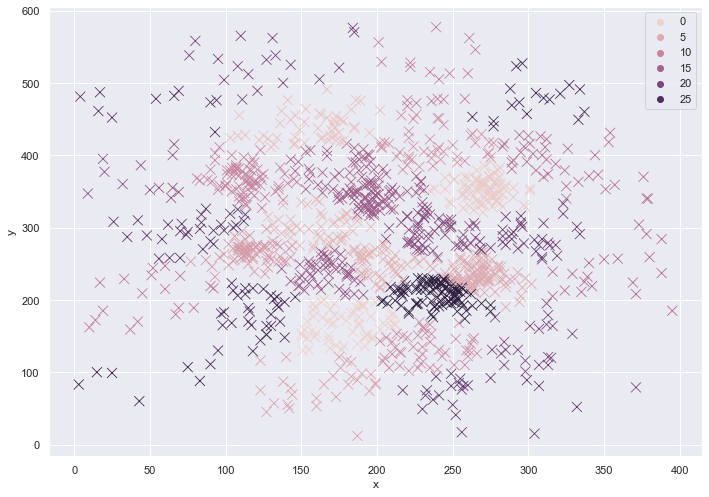

In [374]:
clu = KMeans(30).fit(order_locations)
labels = clu.labels_
# p = sns.color_palette("tab10")
sns.scatterplot(data = order_locations, x = 'x', y = 'y', hue = labels, marker = 'x', s = 100)

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


<AxesSubplot:xlabel='x', ylabel='y'>

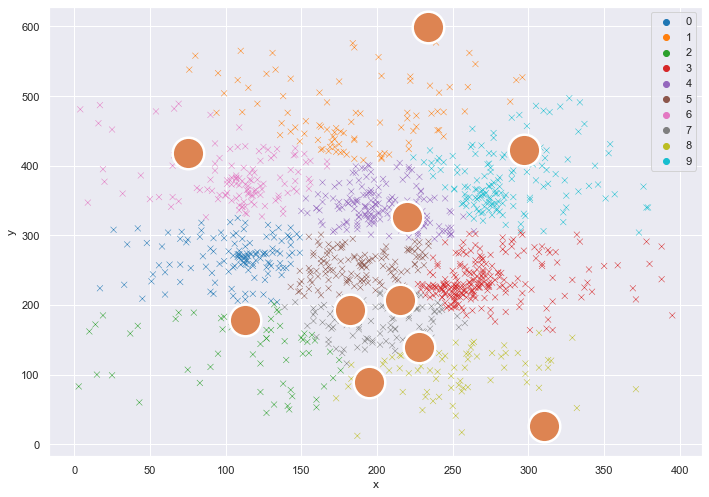

In [369]:
clu = KMeans(10, init = np.array(wrhs_loc)).fit(order_locations)
labels = clu.labels_
centroids = pd.DataFrame(wrhs_loc, columns = ['x', 'y'])
p = sns.color_palette("tab10")
sns.scatterplot(data = order_locations, x = 'x', y = 'y', hue = labels,  palette=p[:10], marker = 'x')
sns.scatterplot(data = centroids, x = 'x', y = 'y', marker = 'o', s = 1000)

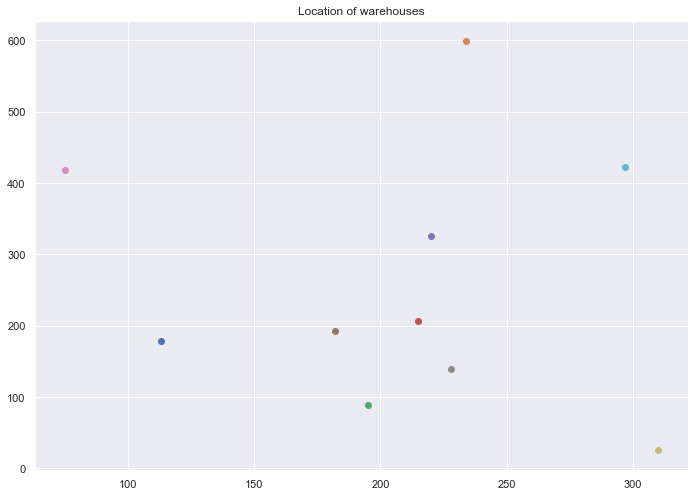

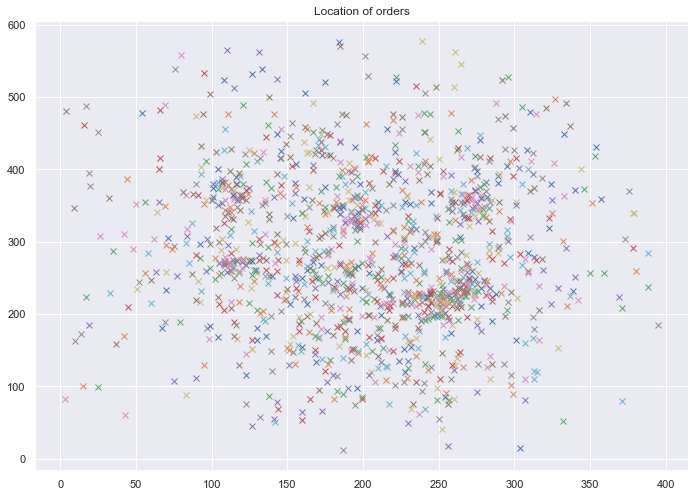

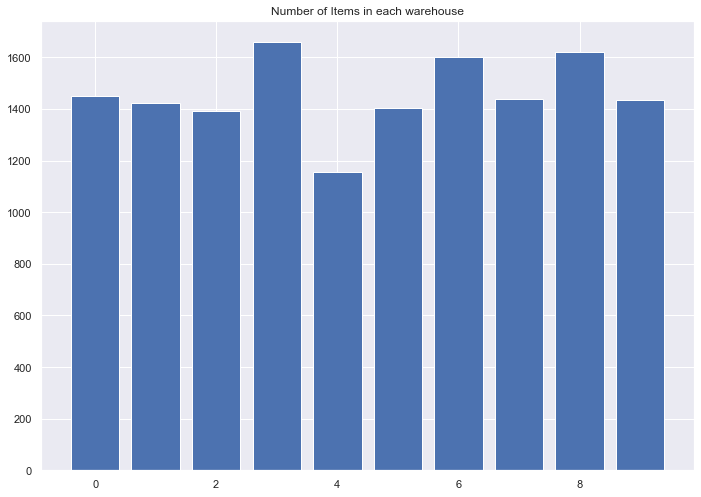

<Figure size 842.4x595.44 with 0 Axes>

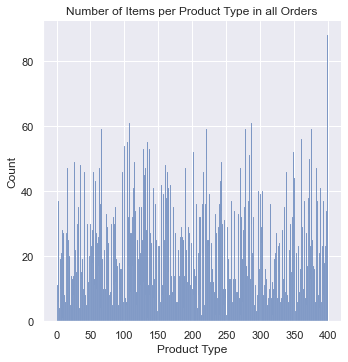

In [9]:
sns.set()

data = sort_data("busy_day.in")
grid_row, grid_col, n_drones, max_turns, max_payload, n_prod_types, weight_prod_types, n_wrhs, wrhs_info, n_orders, order_info = [data[i] for i in range(11)]

#-- Geograhical plot of warehouses and orders
wrhs_loc = [wrhs_info[i][0] for i in range(len(wrhs_info))]
order_loc = [order_info[i][0] for i in range(len(order_info))]
wrhs_num = list(range(n_wrhs))
plt.figure()
plt.title("Location of warehouses")
for i in wrhs_loc:
    plt.plot(i[0], int(i[1]), "-o")
plt.show()

plt.figure()
plt.title("Location of orders")
for i in order_loc:
    plt.plot(i[0], int(i[1]), "-x")
plt.show()

#-- Number of items in each warehouse
wrhs_n_items = [sum(i[1]) for i in wrhs_info]

plt.figure()
plt.title("Number of Items in each warehouse")
plt.bar(range(len(wrhs_info)), wrhs_n_items)
plt.show()

#-- Dataframe for the Orders [Row Location, Col Location, N of items per order]
x_order_loc = [order_info[i][0][0] for i in range(len(order_info))]
y_order_loc = [order_info[i][0][1] for i in range(len(order_info))]
n_items_per_order = [order_info[i][1][0] for i in range(len(order_info))]
df1_orders = pd.DataFrame(list(zip(x_order_loc,y_order_loc,n_items_per_order)), columns = ["X", "Y", "N of Items"])

#-- Dataframe for order Items [order N, product type, loc x, loc y]
for i in range(0, len(order_info)):
    order = [i] * len(order_info[i][2])
    prod_types_order = order_info[i][2]
    xloc = [order_info[i][0][0]] * len(order_info[i][2])
    yloc = [order_info[i][0][1]] * len(order_info[i][2])
    array = np.transpose(np.array([order, prod_types_order, xloc, yloc]))
    if i==0:
        df2 = pd.DataFrame(array, columns=["Order Number", "Product Type", "X", "Y"])
    else:
        subdf = pd.DataFrame(array, columns = ["Order Number", "Product Type", "X", "Y"])
        df2 = df2.append(subdf)

#df2.to_csv(r'/Users/FCRA/Desktop/df2.csv', index = False, header=True)                                             #Insert the path where you want to export the dataframe

#print(pd.value_counts(df2["Product Type"]))                     #number of items per product type - print format

plt.figure()
sns.set(rc = {'figure.figsize':(11.7, 8.27)})                    #number of items per product type - plot format
sns.displot(df2["Product Type"], bins=[i for i in range(n_prod_types)])
plt.title("Number of Items per Product Type in all Orders")
plt.show()

In [177]:
df2.head(10)

,Order Number,Product Type,X,Y
0,0,226,340,371
1,0,183,340,371
2,0,6,340,371
3,0,220,340,371
4,0,299,340,371
5,0,280,340,371
6,0,12,340,371
7,0,42,340,371
0,1,163,163,320
0,2,192,201,331


In [91]:
import string
import random
d = dict(zip(range(n_wrhs), np.random.randint(0,9,[10,10])))
d['types'] = random.sample(string.ascii_letters.lower(),10 )
d['amounts'] = np.random.randint(10, 100, 10)
w = pd.DataFrame(d)
w

,0,1,2,3,4,5,6,7,8,9,types,amounts
0,3,2,2,2,6,5,7,7,4,1,n,83
1,0,3,1,7,3,7,0,6,6,8,v,71
2,1,8,8,4,4,0,0,5,3,5,u,47
3,5,0,5,5,3,6,8,5,8,3,v,90
4,1,7,8,7,4,5,4,3,1,1,b,66
5,8,1,3,7,0,5,1,6,5,3,e,49
6,1,5,5,2,5,5,2,6,6,7,g,39
7,2,4,7,3,4,2,8,0,8,0,r,39
8,1,6,5,8,4,8,4,1,7,7,g,13
9,5,4,8,1,2,7,3,7,6,5,f,65


In [4]:
def dist(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
#     for each drone find the order that minimizes the distance to travel
def find_min_dist(self, order):
    routes = []
    warehouses = pd.DataFrame([Wharehouse(x) for x in self.wh])
#     compute all the distances from the warehouse, sort them by distance from current position
    dist_wh = pd.DataFrame.from_dict(dict(zip(range(n_wrhs), dist(self.cur_pos, wh.pos))), orient = 'index').sort_values(ascending = False)
#     check all the routes for the order (check availability in wharehouse and return the min of all the distances)
    for w in warehouses:
        #check availability
        if np.all(order.types.isin(w.types)):
            #check the amounts
            if order.amounts < w[order.types == w.types].amounts:
                routes.append(w) 
        if np.any(order.types.isin(w.types)):
            multi = [w]
            order_left = order[~order.types.isin(w.types)]
#             for prod_type in order.types[~order.types.isin(w.types)]:
            for m in wharehouses:
                if order_left.amounts < w[order_left.types == w.types].amounts                    
                    multi.append(m)
                #check if the order is finished (amounts == 0
    return compute_best_routes(self, routes).min() #must compute the mininum over all routes but return the names of the wharehouses involved (the route)
    




112993

In [ ]:
    def compute_routes(self, routes, order):#route is a wharehouse or list of wharehouses 
    r = {}
    for route in routes:
        if isinstance(route, int):
            r[route] = dist(self.get_cur_pos, route.pos) + dist(route.pos, order)
        if isinstance(route, list):
            w = route[-1]
            r[tuple(route)] =  sum([dist(self.get_cur_pos, wh.pos) for wh in route]) + dist(w.pos, order)
    return min(r, key = r.get) 

# #     for each drone find the order that minimizes the distance to travel
    def find_min_dist(self, order):
        routes = []
        warehouses = pd.DataFrame([Wharehouse(x) for x in self.wh])
    #     compute all the distances from the warehouse, sort them by distance from current position
        dist_wh = pd.DataFrame.from_dict(dict(zip(range(n_wrhs), dist(self.get_cur_pos, wh.pos))), orient = 'index').sort_values(ascending = False)
    #     check all the routes for the order (check availability in wharehouse and return the min of all the distances)
        for w in warehouses:
            #check availability
            if np.all(order.types.isin(w.types)):
                #check the amounts
                if order.amounts < w[order.types == w.types].amounts:
                    routes.append(w) 
            if np.any(order.types.isin(w.types)):
                multi = [w]
                order_left = order[~order.types.isin(w.types)]
    #             for prod_type in order.types[~order.types.isin(w.types)]:
                for m in wharehouses:
                    if order_left.amounts < w[order_left.types == w.types].amounts                    
                        multi.append(m)
                    #check if the order is finished (amounts == 0
        return compute_best_routes(self, routes) #must compute the mininum over all routes but return the names of the wharehouses involved (the route)


In [6]:
class Dataframes:

    def __init__(self):
        data = sort_data("busy_day.in")
        self.grid_row, \
        self.grid_col, \
        self.n_drones, \
        self.max_turns, \
        self.max_payload, \
        self.n_prod_types, \
        self.weight_prod_types, \
        self.n_wrhs, \
        self.wrhs_info, \
        self.n_orders, \
        self.order_info = [data[i] for i in range(11)]

    def get_df_orders(self):
        x_order_loc = [self.order_info[i][0][0] for i in range(len(self.order_info))]
        y_order_loc = [self.order_info[i][0][1] for i in range(len(self.order_info))]
        n_items_per_order = [self.order_info[i][1][0] for i in range(len(self.order_info))]
        df_orders = pd.DataFrame(list(zip(x_order_loc, y_order_loc, n_items_per_order)),
                                 columns=["X", "Y", "N of Items"])
        return df_orders


In [171]:
def dist(a, b):
    if isinstance(a,np.ndarray) or  isinstance(b,np.ndarray):
        return np.sqrt(((a-b)**2).sum(1))
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

class Drone():  # inherit #product #warehouse #order (#utility)

    def __init__(self, num):
        self.num = num
        self.products_type = []
        self.products_weight = np.array(weight_prod_types)[self.products_type].sum()
        self.products_quantity = []
        self.pld_mass = 0
        self.cur_pos = [0, 0]
        self.turns = 0  # ?
        self.actions = []  # ?
        self.busy = False

        # Df for use throughout
        self.Data = Dataframes()
    
    def __repr__(self):
        return '(num: ' + str(self.num) + ', ' + 'payload_weight: ' + str(sum(self.products_type)) + ')' 
        
    def load(self, prod_type, qnty):
        self.products_type.append(prod_type)
        self.products_quantity.append(qnty)
        # pactions.append([0 L 1 2 3 ]) ?order_number
        self.turns += 1

    def unload(self, prod_type, qnty):  # warehouse
        self.products_type.remove(prod_type)
        self.products_quantity.remove(qnty)
        # actions.append([0 U 1 2 3 ])?order_number
        self.turns += 1

    def update_pld_mass(self):
        tot_weight = 0
        for i in range(len(self.products_type)):
            unit_weight = self.Data.weight_prod_types[self.products_type[i]]
            tot_weight += unit_weight * self.products_quantity[i]
        self.pld_mass = tot_weight

    def deliver(self, prod_type, qnty):  # to the order
        self.products_type.remove(prod_type)
        self.products_quantity.remove(qnty)
        # actions.append([0 D 1 2 3 ])?order_number
        self.turns += 1

    def wait(self, n_turns):
        self.turns += n_turns

    def get_cur_pos(self):
        return self.cur_pos

    def update_cur_pos(self, new_pos):
        self.cur_pos = new_pos  # define in utility class
        
    def find_nearest_order(self, orders):
        o = np.array([orders[x].position for x in orders], dtype = np.float64)
        c = np.array([orders[x].completed for x in orders])
        if c.sum() == 1250:
            return 'All orders fullfilled'
        o[c] = np.inf
        d = dist(self.cur_pos, o)
        return np.argmin(d)
    
    def fulfill_order(self, order):
        products = 
        
d_0 = Drone(0)
d_0.update_cur_pos([0,1])
d_0.find_nearest_order(orders)
# dist([0,1], np.array([orders[o].position for o in orders]))

True

In [168]:
(np.array([orders[x].completed for x in orders]) + 1).sum()

1250

In [172]:
class Warehouse:

    def __init__(self, num, x, y, amounts):
        quantity = np.array(amounts)
        weights = np.array(weight_prod_types)
        types = np.flatnonzero(quantity>0)
        self.num = num
        self.current_position = [x, y]
        self.products_types = types
        self.products_weights = weights[quantity >0]
        self.products_quantity = quantity[quantity >0]
        self.tot_weight = self.products_weights.sum()
        
    def table(self):
        return pd.DataFrame({'Weights': self.products_weights, 'Amounts': self.products_quantity}, index = self.products_types)
    
    def __repr__(self):
        return '(num: ' + str(self.num) + ', ' + 'n_products: '+ str(self.products_quantity.shape[0]) + ', ' + 'tot_weight: ' + str(self.tot_weight) + ', ' + 'tot_amount: ' + str(self.products_quantity.sum()) + ')'
    
    def add_product(self, prod_type, prod_qnt):
        self.product_type.append(prod_type)
        self.products_quantity.append(prod_qnt)

    def remove_product(self, prod_type, prod_qnt):
        self.products_quantity.remove(prod_qnt)
        if self.products_quantity == 0:
            self.product_type.remove(prod_type)


In [9]:
class Order:

    def __init__(self, num, x, y, amount, types):
        self.amount = amount
        weights = np.array(weight_prod_types)
        self.num = num
        self.position = [x, y]
        self.tot_weight = weights[types].sum()
        self.products_weights = weights[types]
        self.products_type = np.array(types)
        self.products_quantity = pd.Series(self.products_type).value_counts()
        self.completed = False
        self.turn_order_completed = 0

    def table(self):
        return pd.DataFrame({'Weights': self.products_weights, 'Amounts': self.products_quantity}, index = self.products_type)
    #display only unique
    
    def __repr__(self):
        return '(num: ' + str(self.num) + ', ' + 'n_items: ' + str(self.products_type.shape[0]) + ', ' + 'tot_weight: ' + str(self.tot_weight) + ')'
    
    def add_product(self, prod_type, prod_qnt):
        self.product_type.append(prod_type)
        self.products_quantity.append(prod_qnt)

    def remove_product(self, prod_type, prod_qnt):
        self.product_type.remove(prod_type)
        self.products_quantity.remove(prod_qnt)

In [173]:
drones = {}
for d in range(n_drones):
    drones[d] = Drone(d)
warehouses = {}
for w in range(n_wrhs):
    warehouses[w] = Warehouse(w, wrhs_info[w][0][0], wrhs_info[w][0][1], wrhs_info[w][1])
orders = {}
for o in range(n_orders):
    orders[o] = Order(o, order_info[o][0][0], order_info[o][0][1], order_info[o][1][0], order_info[o][2])

In [ ]:
# # initialize drones, warehouses and orders
# drones = {}
# for d in range(n_drones):
#     drones[d] = Drone(d)
# warehouses = {}
# for w in range(n_wrhs):
#     warehouses[w] = Warehouse(w, wrhs_info[w][0][0], wrhs_info[w][0][1], wrhs_info[w][1])
# orders = {}
# for o in range(n_orders):
#     orders[o] = Order(o, order_info[o][0][0], order_info[o][0][1], order_info[o][1][0], order_info[o][2])
    
# max_weight = max_payload #set the max weight for the order 

# for t in max_turns:
# #   divide orders into those which can be fulfilled by only one drone and those which require more
# #   should also take into account those orders that are so light that allow the drone to load some thing else
    
#     drone.dist_from_order(orders)
#     dis = np.ones([n_drones, n_orders])
#     for o in individual_orders:
#         for d in drones:
#             dis[d] = drones[d].find_min_dist(order[o]) #get for drone d an array with the distances(taking into account the warehouses routes) for every order, then compare with other drones and get the mins(remove the selected and get the mins iteratively)
#     #need to take into account orders delivered by multiple drones (and also multiple orders delivered by drone)
            

In [ ]:
# initialize drones, warehouses and orders
drones = {}
for d in range(n_drones):
    drones[d] = Drone(d)
warehouses = {}
for w in range(n_wrhs):
    warehouses[w] = Warehouse(w, wrhs_info[w][0][0], wrhs_info[w][0][1], wrhs_info[w][1])
orders = {}
for o in range(n_orders):
    orders[o] = Order(o, order_info[o][0][0], order_info[o][0][1], order_info[o][1][0], order_info[o][2])
    
max_weight = max_payload #set the max weight for the order 

for t in max_turns:
    for d in drones:
        
        nearest_order = d.find_nearest_order(orders)
        if nearest_order == 'All orders fullfilled'
            return "THE END"
        if nearest_order.tot_weight < max_weight:
            d.fullfill_order(nearest_order)
        
        
            

In [ ]:
o_array = np.array([orders[x] for x in orders])
d_array = np.array([drones[x] for x in drones])
find_min_dist(o_array, d_array)

In [12]:
pd.DataFrame(np.random.randint(0, 20, size = [3,9]))

,0,1,2,3,4,5,6,7,8
0,6,15,8,5,6,0,16,17,2
1,8,19,14,1,2,8,4,13,3
2,4,5,7,13,16,15,12,17,12
